In [1]:
import pandas as pd

In [12]:
data = pd.read_csv("salary_data.csv")
df = data

In [13]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
df.tail(20)

,YearsExperience,Salary
10,3.9,63218.0
11,4.0,55794.0
12,4.0,56957.0
13,4.1,57081.0
14,4.5,61111.0
15,4.9,67938.0
16,5.1,66029.0
17,5.3,83088.0
18,5.9,81363.0
19,6.0,93940.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [16]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [17]:
df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [18]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [19]:
df.shape

(30, 2)

In [20]:
feature_col = 'YearsExperience' if 'YearsExperience' in df.columns else df.columns[0]
target_col = 'Salary' if 'Salary' in df.columns else df.columns[1]

In [21]:
X = df[feature_col].values.reshape(-1, 1).astype(float)
y = df[target_col].values.reshape(-1, 1).astype(float)


In [22]:
import numpy as np
mask = ~np.isnan(X).ravel() & ~np.isnan(y).ravel()
X = X[mask]
y = y[mask]

In [23]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1.0
X_norm = (X - X_mean) / X_std

def add_bias(x):
    return np.hstack([np.ones((x.shape[0], 1)), x])

X_with_bias = add_bias(X_norm)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train_val, X_test, y_train_val, y_test = train_test_split(X_with_bias, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17647, random_state=42)

def compute_predictions(X, theta):
    return X.dot(theta)

def compute_cost(X, y, theta):
    m = X.shape[0]
    preds = compute_predictions(X, theta)
    cost = (1/(2*m)) * np.sum((preds - y) ** 2)
    return cost

def gradient_descent(X, y, theta_init, learning_rate=0.01, epochs=100):
    m = X.shape[0]
    theta = theta_init.copy()
    history = {'theta': [], 'cost': [], 'preds': []}
    for epoch in range(epochs):
        preds = compute_predictions(X, theta)
        error = preds - y
        grad = (1/m) * (X.T.dot(error))
        theta = theta - learning_rate * grad
        cost = compute_cost(X, y, theta)
        history['theta'].append(theta.copy())
        history['cost'].append(cost)
        history['preds'].append(preds.copy())
    return theta, history

In [29]:
learning_rates = [0.001, 0.003, 0.01, 0.03, 0.05, 0.1]
epoch_options = [50, 100, 200, 500]

best_config = None
best_val_r2 = -np.inf

for lr in learning_rates:
    for epochs in epoch_options:
        theta_init = np.zeros((2,1))
        theta_trained, history = gradient_descent(X_train, y_train, theta_init, learning_rate=lr, epochs=epochs)
        val_preds = compute_predictions(X_val, theta_trained)
        val_r2 = r2_score(y_val, val_preds)
        if val_r2 > best_val_r2:
            best_val_r2 = val_r2
            best_config = {'learning_rate': lr, 'epochs': epochs, 'theta': theta_trained, 'history': history}
        print(f"lr={lr:<6} epochs={epochs:<4} -> val R2: {val_r2:.4f}  cost(end): {history['cost'][-1]:.4f}")

lr=0.001  epochs=50   -> val R2: -6.9219  cost(end): 2780771069.1496
lr=0.001  epochs=100  -> val R2: -6.2198  cost(end): 2522860262.0266
lr=0.001  epochs=200  -> val R2: -5.0021  cost(end): 2076831614.5389
lr=0.001  epochs=500  -> val R2: -2.4774  cost(end): 1160038160.9995
lr=0.003  epochs=50   -> val R2: -5.5800  cost(end): 2288305513.5364
lr=0.003  epochs=100  -> val R2: -3.9935  cost(end): 1708999943.6091
lr=0.003  epochs=200  -> val R2: -1.9057  cost(end): 954804749.3424
lr=0.003  epochs=500  -> val R2: 0.3420  cost(end): 172093160.4351
lr=0.01   epochs=50   -> val R2: -2.4636  cost(end): 1155078950.0363
lr=0.01   epochs=100  -> val R2: -0.4456  cost(end): 439019323.6004
lr=0.01   epochs=200  -> val R2: 0.6665  cost(end): 69695827.7549
lr=0.01   epochs=500  -> val R2: 0.9096  cost(end): 9302606.7322
lr=0.03   epochs=50   -> val R2: 0.3613  cost(end): 165802259.5383
lr=0.03   epochs=100  -> val R2: 0.8608  cost(end): 17189807.1100
lr=0.03   epochs=200  -> val R2: 0.9131  cost(end)

In [48]:
X_trainval_combined = np.vstack([X_train, X_val])
y_trainval_combined = np.vstack([y_train, y_val])
theta_init = np.zeros((2,1))
best_lr = best_config['learning_rate']
best_epochs = best_config['epochs']

theta_final, history_final = gradient_descent(X_trainval_combined, y_trainval_combined, theta_init, learning_rate=best_lr, epochs=best_epochs)

y_test_pred = compute_predictions(X_test, theta_final)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R2: ", test_r2)
print("MAE: ", test_mae)
print("MSE: ", test_mse)

R2:  0.8691472291266255
MAE:  6980.072585105378
MSE:  7680.147914700756


In [41]:
import matplotlib.pyplot as plt

X_orig = df[feature_col].values.reshape(-1,1)
x_plot = np.linspace(X_orig.min(), X_orig.max(), 100).reshape(-1,1)
x_plot_norm = (x_plot - X_mean) / X_std
x_plot_with_bias = add_bias(x_plot_norm)

In [42]:
import os

frames_dir = "/mnt/data/linear_frames"
os.makedirs(frames_dir, exist_ok=True)
frame_paths = []

max_frames = 100
epoch_count = len(history_final['theta'])
sampled_epochs = np.unique(np.linspace(0, epoch_count-1, min(epoch_count, max_frames), dtype=int))

for idx, epoch_idx in enumerate(sampled_epochs):
    theta_epoch = history_final['theta'][epoch_idx]
    y_plot_epoch = x_plot_with_bias.dot(theta_epoch)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.scatter(X_orig, y, alpha=0.8)
    ax.plot(x_plot, y_plot_epoch, linewidth=2)
    ax.set_xlabel(feature_col)
    ax.set_ylabel(target_col)
    ax.set_title(f"Epoch {epoch_idx+1}/{best_epochs} - cost: {history_final['cost'][epoch_idx]:.4f}")
    ax.set_xlim(X_orig.min() - 1, X_orig.max() + 1)
    frame_path = os.path.join(frames_dir, f"frame_{idx:04d}.png")
    fig.tight_layout()
    fig.savefig(frame_path)
    plt.close(fig)
    frame_paths.append(frame_path)

In [54]:
import imageio
from IPython.display import display

gif_path = "/content/linear_regression.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.25) as writer:
    for fp in frame_paths:
        image = imageio.imread(fp)
        writer.append_data(image)

/tmp/ipython-input-2534180225.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(fp)


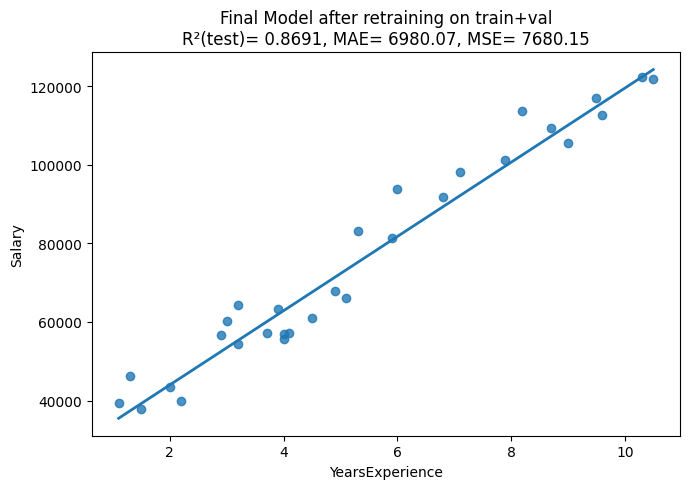

Animation saved to: /content/linear_regression.gif


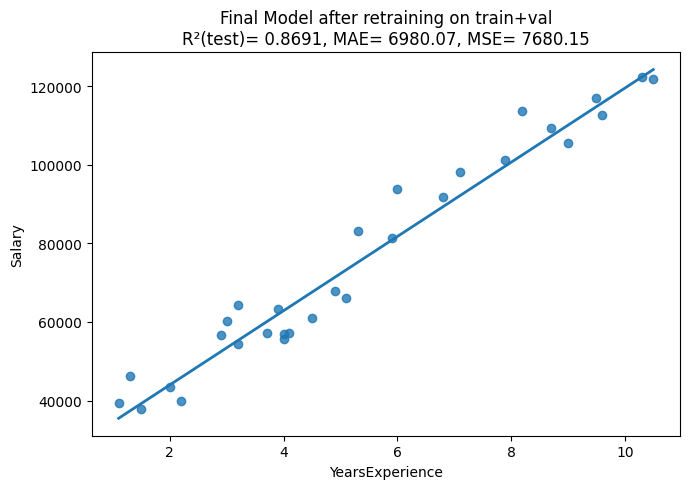

In [55]:
final_line = x_plot_with_bias.dot(theta_final)
fig2, ax2 = plt.subplots(figsize=(7,5))
ax2.scatter(X_orig, y, alpha=0.8)
ax2.plot(x_plot, final_line, linewidth=2)
ax2.set_xlabel(feature_col)
ax2.set_ylabel(target_col)
ax2.set_title(f"Final Model after retraining on train+val\nR²(test)= {test_r2:.4f}, MAE= {test_mae:.2f}, MSE= {test_mse:.2f}")
fig2.tight_layout()
display(fig2)

print("Animation saved to:", gif_path)